# REVIEW RATING PREDICTION PROJECT:

# Importing Necessary Libraries:

In [1]:
# Preprocessing
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy as stats

# To remove outliers
from scipy.stats import zscore

#importing nltk libraries
import nltk
from nltk.corpus import stopwords
import re
import string
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import FreqDist

# Evaluation Metrics
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve,accuracy_score,roc_auc_score,hamming_loss, log_loss

# Warning
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Importing Dataset Obtained from webscraping

In [2]:
#Reading csv file 
df = pd.read_csv("ratings and reviews.csv")
df

,Unnamed,Unnamed: 0,Comment,Rating
0,0,0,I was little confused after ordering it as few...,5.0
1,1,1,I have over the years developed good trust in...,5.0
2,2,2,Happy to say that it's a wonderful Washing mac...,5.0
3,3,3,I buy on sep 19 but its not working taking wat...,5.0
4,4,4,Affordable and awesome go for it,5.0
...,...,...,...,...
28568,12949,12949,"Not usable for professionals,",1
28569,12950,12950,( Honest opinion)\nGreat Product I would say.....,5
28570,12951,12951,"Mouse disconnects automatically,in 3 minutes idle",2
28571,12952,12952,Touch pad turns off automatically after few se...,2


I have imported the data collected from webscraping in csv format and stored it as a dataframe. We can see the first 5 and last 5 observations of the dataset and it looks good also we have all string valued columns. In this particular dataset we have about 28573  rows and 4 columns Unnamed: 0 and Unnamed: 0.1 and the index column of csv file so these columns can be dropped from our dataset. Since Rating is my target column and it is a categorical column with 5 categories so this problem is a Multi Classification Problem.


# Feature Information:

- Comment : Text Content of the Review.

- Rating : Ratings out of 5 stars.

# Exploratory Data Analysis [EDA]:

Since Unnamed: 0 is the index column of csv file so let's drop that column as it will not help us in our predictions.

In [3]:
# Dropping unnecessary column
df.drop(columns = 'Unnamed: 0', inplace = True)
df.drop(columns = 'Unnamed', inplace = True)
df

,Comment,Rating
0,I was little confused after ordering it as few...,5.0
1,I have over the years developed good trust in...,5.0
2,Happy to say that it's a wonderful Washing mac...,5.0
3,I buy on sep 19 but its not working taking wat...,5.0
4,Affordable and awesome go for it,5.0
...,...,...
28568,"Not usable for professionals,",1
28569,( Honest opinion)\nGreat Product I would say.....,5
28570,"Mouse disconnects automatically,in 3 minutes idle",2
28571,Touch pad turns off automatically after few se...,2


In [4]:
# Checking the shape of the dataset
print("There are {} Rows and {} Columns in the dataset".format(df.shape[0], df.shape[1]))

There are 28573 Rows and 2 Columns in the dataset


So there are 28573 rows and 2 columns in the dataset.

In [5]:
# Checking the column names in the dataset
print("Columns present in the dataset are:\n",df.columns)

Columns present in the dataset are:
 Index(['Comment', 'Rating'], dtype='object')


So above 2 are the column names in the dataset.

In [6]:
# Let's check the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28573 entries, 0 to 28572
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  28428 non-null  object
 1   Rating   28573 non-null  object
dtypes: object(2)
memory usage: 446.6+ KB


By observing the info we can say that there are some null values in the dataset and all the columns are of object data type which means all the entries are string entries.

In [7]:
# Checking the unique value count of target column
df['Rating'].unique()

array(['5.0', '4.0', '3.0', '-', '2.0', '1.0', '5', '4', '1', '2', '3'],
      dtype=object)

Looking the above entries in target column we can observe that 
- There are some blank spaces in the column which need to be addressed
- There are string entrie which we shall replace with their respective rating values(stars).

In [8]:
#Converting to numeric datatype
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

In [9]:
# Checking for null values
print("Null values in the dataset: \n", df.isnull().sum())

Null values in the dataset: 
 Comment    145
Rating     168
dtype: int64


So we have a minimal amount of nan values in the Comment column of the dataset. Apart from the star ratings there is another column which has nan values. Let's view the percentage of the nan values in the both the Rating and Comment columns. 

In [10]:
#Checking the percentage of missing / nan values in the columns
percent_missing1 = df. isnull(). sum() * 100 / len(df)
percent_missing1

Comment    0.507472
Rating     0.587968
dtype: float64

There are approximately 0.5% null values in both the columns. We can use imputation methods to fill these nan values but this could impact the model, so these rows with null values can be dropped from the dataset

In [11]:
#Dropping the rows with null values
df = df.dropna()
df

,Comment,Rating
0,I was little confused after ordering it as few...,5.0
1,I have over the years developed good trust in...,5.0
2,Happy to say that it's a wonderful Washing mac...,5.0
3,I buy on sep 19 but its not working taking wat...,5.0
4,Affordable and awesome go for it,5.0
...,...,...
28568,"Not usable for professionals,",1.0
28569,( Honest opinion)\nGreat Product I would say.....,5.0
28570,"Mouse disconnects automatically,in 3 minutes idle",2.0
28571,Touch pad turns off automatically after few se...,2.0


Now after dropping the null values we have 28260 rows and 2 columns in the dataset

In [12]:
#Checking for null values again
df.isnull().sum()

Comment    0
Rating     0
dtype: int64

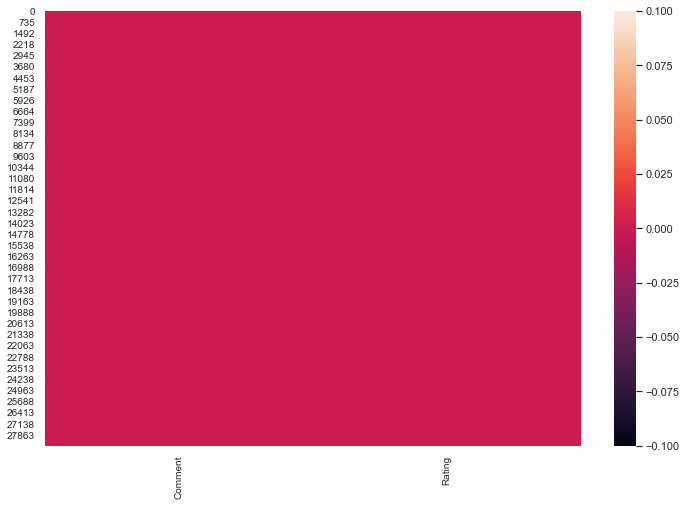

In [13]:
# Let's visualize the null values clearly in dataset using heat map
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(data=df.isnull())
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.show()

Now we can observe that there are no null values in the dataset

In [14]:
# Checking the unique value count of target column
df['Rating'].unique()

array([5., 4., 3., 2., 1.])

In [15]:
#Converting the values in the column to integer datatype
df['Rating'] = df['Rating'].astype('int')

In [16]:
# Checking the unique value count of target column again
df['Rating'].unique()

array([5, 4, 3, 2, 1])

Now we can see that the entries in the rating column are in integers

### Let's have a look into our Review column and see first 2 entries how the data looks:

In [17]:
# Checking data of first row in Review column
df['Comment'][0]

'I was little confused after ordering it as few reviews regarding this WM was negative because they recieved damaged products.  Trust me it was greatly handled by Amazon and delivery guys in my case and its working very fine, no complain!  shown me open box as policy after checking product they delivered it on 2nd floor.  Thanks amazon, highly satisfied with this order.  Regarding washing and other features it working fine and about noise i want to say come on guys its a machine it will make little noise as its spinning, but its not irritating, for me its a silent, its like little more than phone on vibration mode.  Blindly go for it, if its handled by good logistics than you wont regret regarding product.'

In [18]:
# Checking data of second row in Review column
df['Comment'][1]

" I have over the years developed good trust in Amazon basic's products. Washing machine, microwave, refrigerators, laptops, any thing they make and sell is reliable, good quality, excellent service , zero delivery issues, no problems with installations! Now I find it easier and more reliable than walking into a store nearby . Amazon Basics gives better products and service at much lower price. Great products great experience!!👍👌"

By observing the Reviews we can say that there are many words, numbers, as well as punctuations which are not important for our predictions. So we need to do good text processing.

# Text Processing:

In [19]:
#Here I am defining a function to replace some of the contracted words to their full form and removing urls and some unwanted text 
def decontracted(text):
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don’t", "do not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"im ", "i am", text)
    text = re.sub(r"yo ", "you ",text)
    text = re.sub(r"doesn’t", "does not",text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"<br>", " ", text)
    text = re.sub(r'http\S+', '', text) #removing urls
    return text

In [20]:
# Changing all words to Lowercase
df['Comment'] = df['Comment'].apply(lambda x : x.lower())

df['Comment'] = df['Comment'].apply(lambda x : decontracted(x))

# Removing punctuations
df['Comment'] = df['Comment'].str.replace('[^\w\s]','')
df['Comment'] = df['Comment'].str.replace('\n',' ')

### Let's have a look into our text again:

In [21]:
# Checking data of first row in Comment column again
df['Comment'][0]

'i was little confused after ordering it as few reviews regarding this wm was negative because they recieved damaged products  trust me it was greatly handled by amazon and delivery guys in my case and its working very fine no complain  shown me open box as policy after checking product they delivered it on 2nd floor  thanks amazon highly satisfied with this order  regarding washing and other features it working fine and about noise i want to say come on guys its a machine it will make little noise as its spinning but its not irritating for me its a silent its like little more than phone on vibration mode  blindly go for it if its handled by good logistics than you wont regret regarding product'

In [22]:
# Checking data of second row in Comment column again
df['Comment'][1]

' i have over the years developed good trust in amazon basic is products washing machine microwave refrigerators laptops any thing they make and sell is reliable good quality excellent service  zero delivery issues no problems with installations now i find it easier and more reliable than walking into a store nearby  amazon basics gives better products and service at much lower price great products great experience'

Now the data looks far better than previous. And we have successfully removed punctuations and unwanted text from our text and lowercased all the text data.

# Removing StopWords:

In [23]:
# Removing stopwords
stop = stopwords.words('english')
df['Comment'] = df['Comment'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [24]:
# Checking the text data again
df['Comment'][0]

'little confused ordering reviews regarding wm negative recieved damaged products trust greatly handled amazon delivery guys case working fine complain shown open box policy checking product delivered 2nd floor thanks amazon highly satisfied order regarding washing features working fine noise want say come guys machine make little noise spinning irritating silent like little phone vibration mode blindly go handled good logistics wont regret regarding product'

In [25]:
# Checking the text data again
df['Comment'][1]

'years developed good trust amazon basic products washing machine microwave refrigerators laptops thing make sell reliable good quality excellent service zero delivery issues problems installations find easier reliable walking store nearby amazon basics gives better products service much lower price great products great experience'

Now we have removed all stop words from the text data.

# Lemmatization:

In [26]:
#Initialising lemmatizer
lemmatizer = nltk.stem.WordNetLemmatizer()

In [27]:
#Downloading all required content from following link
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [28]:
#Defining functiom to convert nltk tag to wordnet tags
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [29]:
#defining function to lemmatize our text
def lemmatize_sentence(sentence):
    #tokenize the sentence & find the pos tag
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x : (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatize_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatize_sentence.append(word)
        else:
            lemmatize_sentence.append(lemmatizer.lemmatize(word,tag))
    return " ".join(lemmatize_sentence)

In [30]:
df['Comment'] = df['Comment'].apply(lambda x : lemmatize_sentence(x))

In [31]:
# Checking the text data again
df['Comment'][0]

'little confused order review regard wm negative recieved damage product trust greatly handle amazon delivery guy case work fine complain show open box policy check product deliver 2nd floor thanks amazon highly satisfied order regard wash feature work fine noise want say come guy machine make little noise spin irritate silent like little phone vibration mode blindly go handle good logistics wont regret regard product'

In [32]:
# Checking the text data again
df['Comment'][1]

'year develop good trust amazon basic product wash machine microwave refrigerator laptops thing make sell reliable good quality excellent service zero delivery issue problem installation find easy reliable walk store nearby amazon basic give good product service much low price great product great experience'

So now we have removed the inflectional endings and left out with the base or dictionary form of a word.

# Text Normalization - Standardization:

In [33]:
#Noice removal
def scrub_words(text):
    #remove html markup
    text = re.sub("(<.*?>)", "", text)
    #remove non-ascii and digits
    text = re.sub("(\\W)", " ", text)
    text = re.sub("(\\d)", "", text)
    #remove white space
    text = text.strip()
    return text

In [34]:
df['Comment'] = df['Comment'].apply(lambda x : scrub_words(x))

In [35]:
# Checking the text data again
df['Comment'][0]

'little confused order review regard wm negative recieved damage product trust greatly handle amazon delivery guy case work fine complain show open box policy check product deliver nd floor thanks amazon highly satisfied order regard wash feature work fine noise want say come guy machine make little noise spin irritate silent like little phone vibration mode blindly go handle good logistics wont regret regard product'

In [36]:
# Checking the text data again
df['Comment'][1]

'year develop good trust amazon basic product wash machine microwave refrigerator laptops thing make sell reliable good quality excellent service zero delivery issue problem installation find easy reliable walk store nearby amazon basic give good product service much low price great product great experience'

Finally I have defined a function scrub_words for removing the noise from the text. It will remove any html markups, digits and white spaces from the text.

Now We did all the text-processing steps and got required input for our model. We will get into Visualization part now.

# Visualization:

## i) Word Counts:

In [37]:
# Creating column for word counts in the text
df['Comment_WordCount'] = df['Comment'].apply(lambda x: len(str(x).split(' ')))
df[['Comment_WordCount','Comment']].head()

,Comment_WordCount,Comment
0,65,little confused order review regard wm negativ...
1,44,year develop good trust amazon basic product w...
2,115,happy say wonderful washing machine quality su...
3,18,buy sep work take water wash drum move litera...
4,3,affordable awesome go


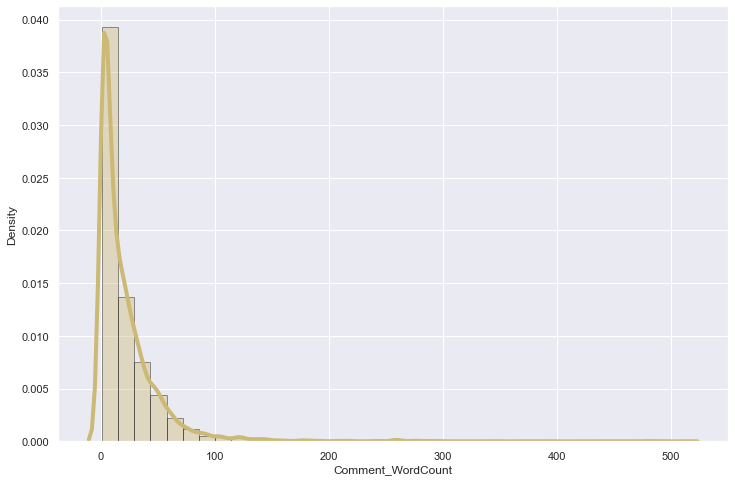

In [38]:
# density plot and histogram of Review word count
sns.distplot(df['Comment_WordCount'], hist = True, kde = True,
            bins = int(180/5), color = 'y',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

By observing the histogram we can clearly see that most of our text is having the number of words in the range of 0 to 100, But some of the reviews are too lengthy which may act like outliers in our data.

## ii) Character count:

In [39]:
# Creating column for character counts in the text
df['Comment_ChaCount'] = df['Comment'].str.len()
df[['Comment_ChaCount','Comment']].head()

,Comment_ChaCount,Comment
0,419,little confused order review regard wm negativ...
1,307,year develop good trust amazon basic product w...
2,668,happy say wonderful washing machine quality su...
3,96,buy sep work take water wash drum move litera...
4,21,affordable awesome go


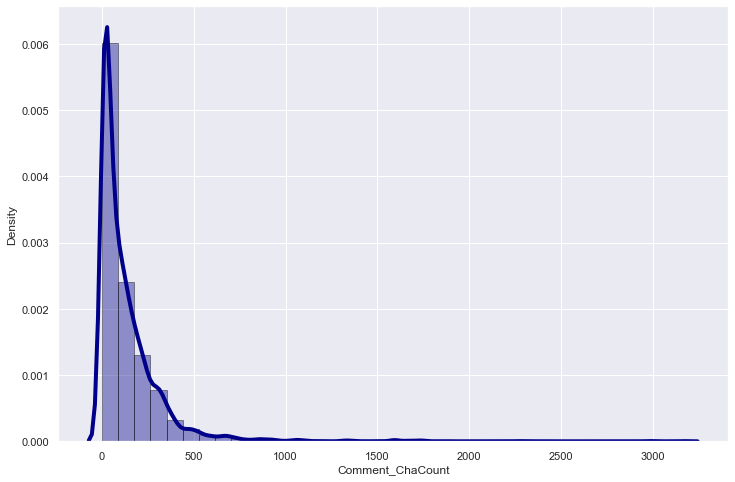

In [40]:
# density plot and histogram of all character count
sns.distplot(df['Comment_ChaCount'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

Above plot represents histogram for character count of Review text, which is quite similar to the histogram of word count.

# Removing Outliers:

As we know that some of the review are too lengthy, so i have to treat them as outliers and remove them using z_score method.

In [41]:
#Checking the shape of the dataset
df.shape

(28260, 4)

In [42]:
# Applying zscore to remove outliers
from scipy import stats
from scipy.stats import zscore
z_score = zscore(df[['Comment_WordCount']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
df.shape

(27790, 4)

In [44]:
outliers_percentage = (28260 - 27790) * 100 / 28260
outliers_percentage

1.6631280962491153

By removing the outliers we are losing 1.66% of data which is very less and it is in acceptable range.

## Plotting histograms for word count and character counts again after removing outliers:

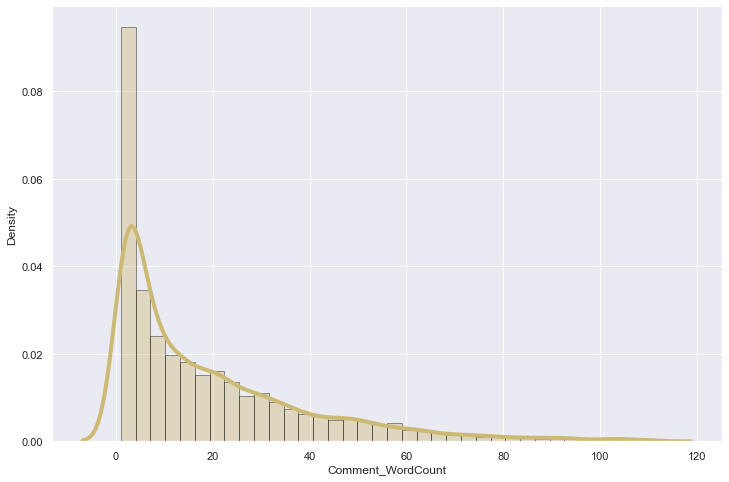

In [45]:
# density plot and histogram of Review word count
sns.distplot(df['Comment_WordCount'], hist = True, kde = True,
            bins = int(180/5), color = 'y',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

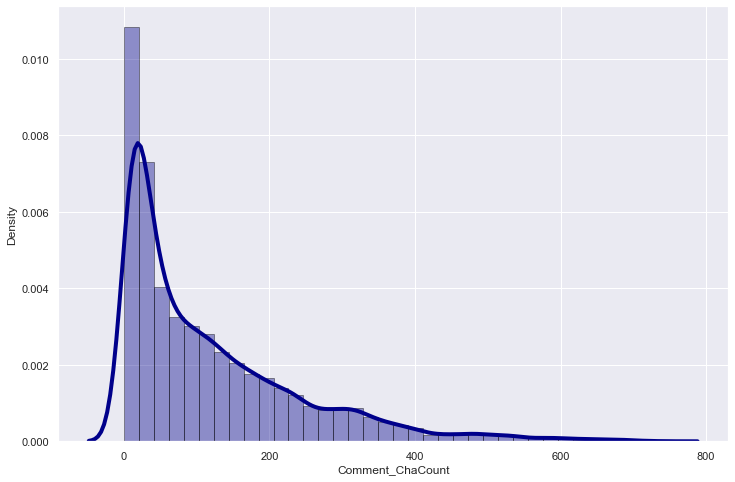

In [46]:
# density plot and histogram of all character count
sns.distplot(df['Comment_ChaCount'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

After plotting histograms for word counts and character counts and after removing outliers we can see we are left out with good range of number of words and characters.

# iii) Top 30 most frequently occuring words:

In [47]:
#function to plot most frequent terms
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    #selecting top 30 most freq words
    d = words_df.nlargest(columns = 'count', n = terms)
    plt.figure(figsize = (20,10))
    ax = sns.barplot(data = d, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()

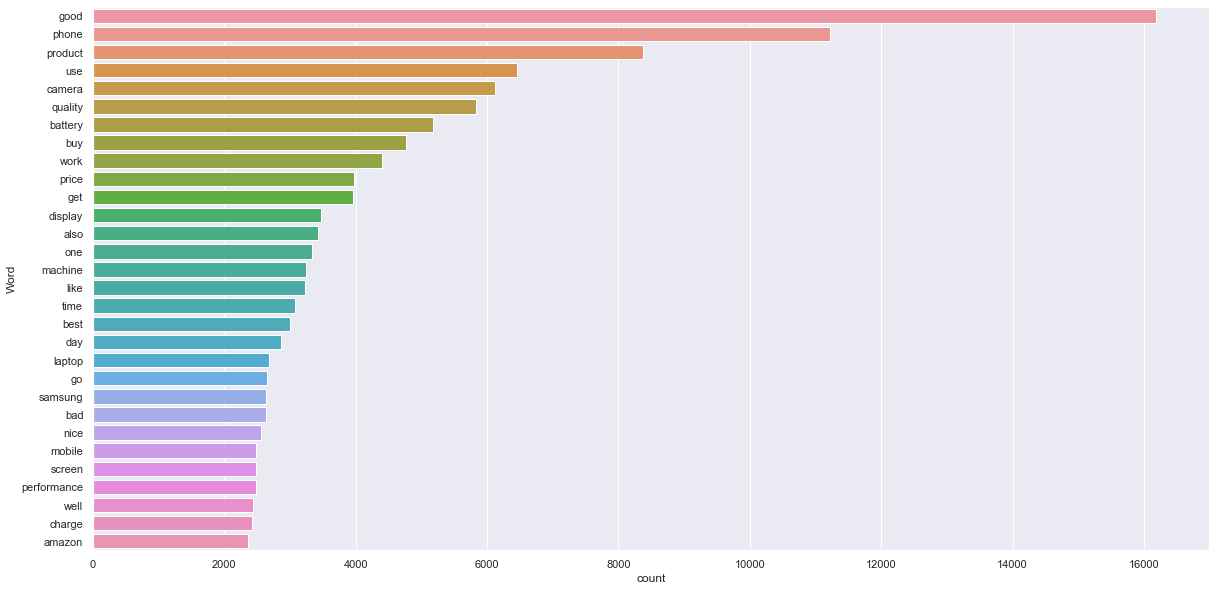

In [48]:
freq_words(df['Comment'])

By seeing the above plot we can see that Good, phone, product, use......are occurring frequently.

# iv) Top 30 Rare words:

In [49]:
#function to plot least frequent terms
def rare_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    #selecting top 30 most freq words
    d = words_df.nsmallest(columns = 'count', n = terms)
    plt.figure(figsize = (20,10))
    ax = sns.barplot(data = d, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()

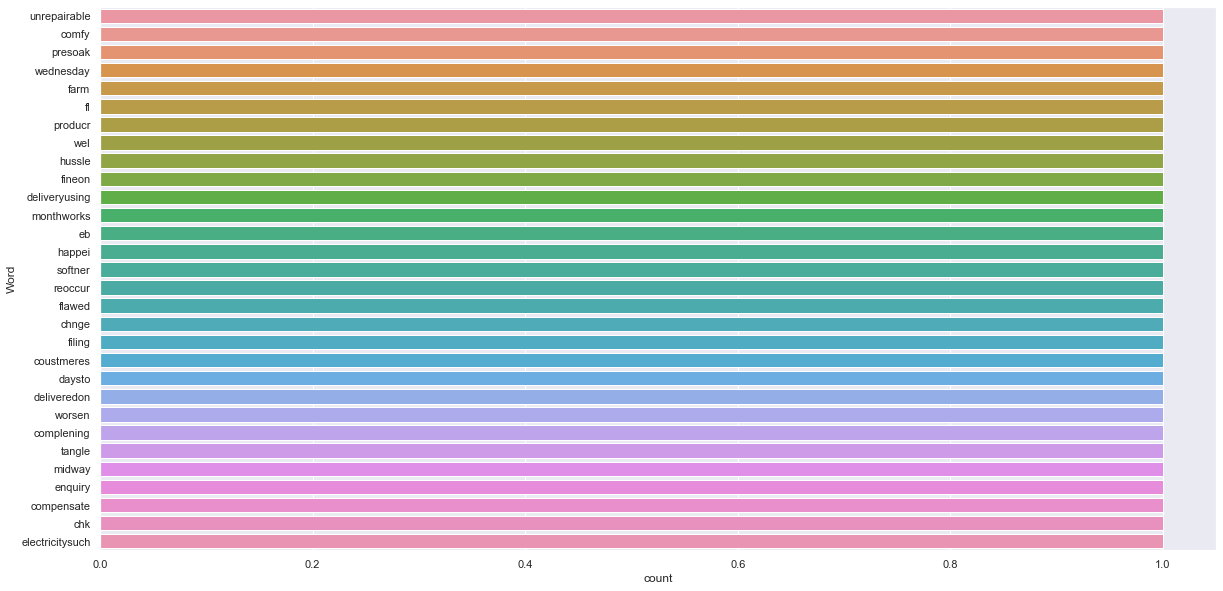

In [50]:
rare_words(df['Comment'])

Above list of words are have rare occurance in Review.

# v) Word cloud:

In [51]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
                    background_color='white',
                    stopwords = stopwords,
                    max_words = 500,
                    max_font_size = 40,
                    scale = 3,
                    random_state = 1).generate(str(data))
    fig = plt.figure(1, figsize=(15,15))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

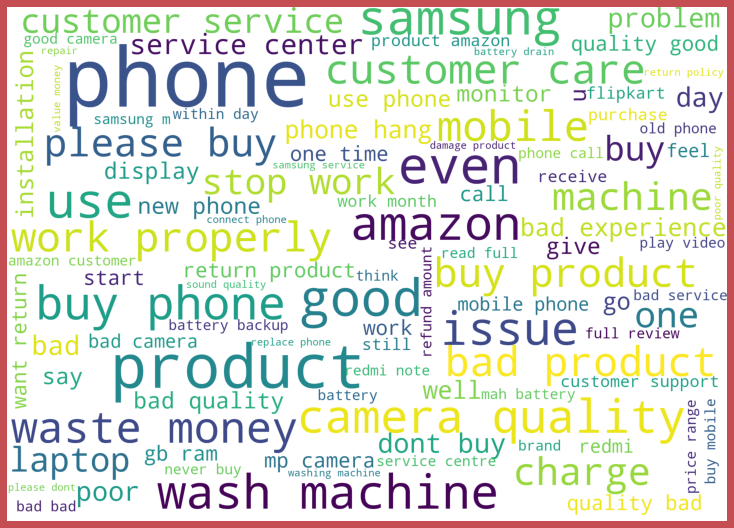

In [53]:
#Let's plot the loud words with Rating 1
from wordcloud import WordCloud

df1=df['Comment'][df['Rating']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

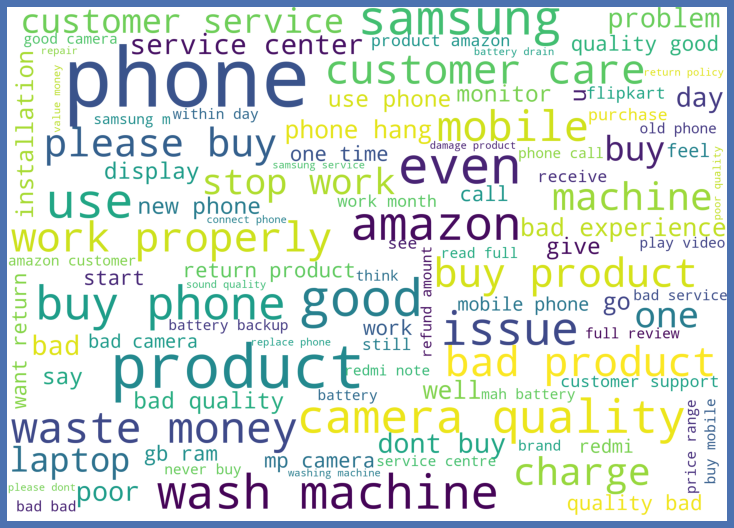

In [54]:
#Let's plot the loud words with Rating 2
from wordcloud import WordCloud

df2=df['Comment'][df['Rating']==2]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

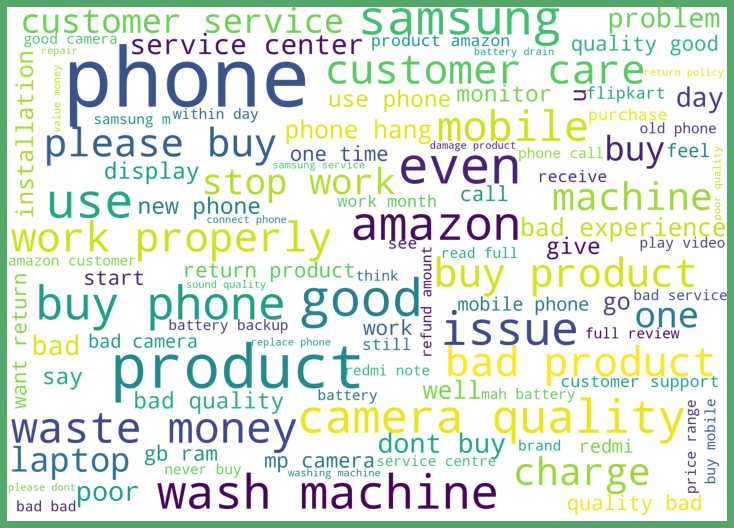

In [55]:
#Let's plot the loud words with Rating 3
from wordcloud import WordCloud

df3=df['Comment'][df['Rating']==3]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='g')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

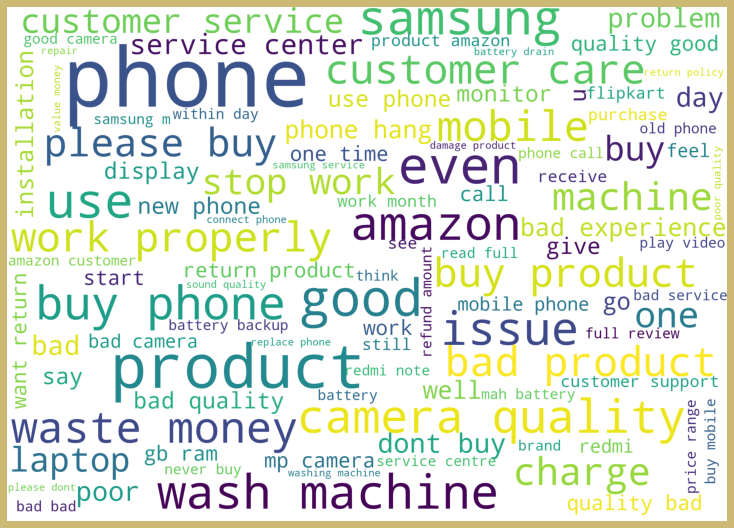

In [56]:
#Let's plot the loud words with Rating 4
from wordcloud import WordCloud

df4=df['Comment'][df['Rating']==4]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='y')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)

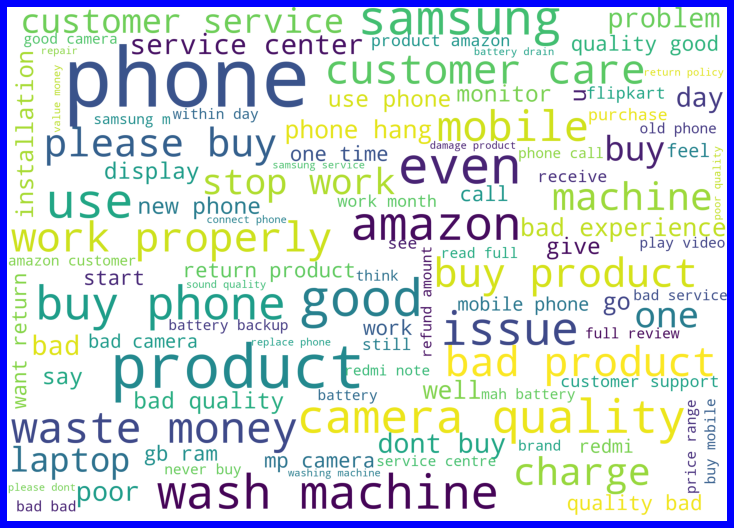

In [57]:
#Let's plot the loud words with Rating 5
from wordcloud import WordCloud

df5=df['Comment'][df['Rating']==5]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='blue')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)

### Observations:
- From the above plots we can clearly see the words which are indication of Reviewer's opinion on products.
- Here most frequent words used for each Rating is displayed in the word cloud.

In [58]:
#Checking the value counts of Rating column
df.Rating.value_counts()

5    11009
4     5785
1     4272
3     3625
2     3099
Name: Rating, dtype: int64

# Model Building and Evaluation:

In [60]:
# Separating feature and label
x = df['Comment']
y = df['Rating']

# Converting text data into vectors using Tfidf Vectorizer:

In [61]:
#using the n_gram tfidf vectorizer(Word vectors)
from sklearn.feature_extraction.text import TfidfVectorizer
word_vectorizer = TfidfVectorizer(
                                sublinear_tf = True,
                                strip_accents = 'unicode',
                                analyzer = 'word',
                                token_pattern = r'\w{1,}',
                                stop_words = 'english',
                                ngram_range = (1,3),
                                max_features = 100000)
word_vectorizer.fit(x)
train_word_features = word_vectorizer.transform(x)

In [62]:
#Character vectorizer
char_vectorizer = TfidfVectorizer(
                                sublinear_tf = True,
                                strip_accents = 'unicode',
                                analyzer = 'char',
                                stop_words = 'english',
                                ngram_range = (2,6),
                                max_features = 50000)
char_vectorizer.fit(x)
train_char_features = char_vectorizer.transform(x)

In [63]:
#Combining both word vectors and character vectors as input for our model
from scipy.sparse import hstack
train_features = hstack([train_char_features,train_word_features])

# Splitting the data into train and test:

In [64]:
# Splitting train and test data
seed = 1
x_train, x_test, y_train, y_test = train_test_split(train_features, y, test_size = 0.25, random_state = seed)

# Data Balancing:

In [65]:
#lets check the shapes of traning and test data
print("x_train", x_train.shape)
print("x_test", x_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

x_train (20842, 150000)
x_test (6948, 150000)
y_train (20842,)
y_test (6948,)


Now let's do oversmapling in order to make data balanced.

In [66]:
#Checking the value counts of Rating column
y.value_counts()

5    11009
4     5785
1     4272
3     3625
2     3099
Name: Rating, dtype: int64

In [67]:
#Checking the number of classes before fit
from collections import Counter
print("The number of classes before fit{}".format(Counter(y_train)))

The number of classes before fitCounter({5: 8286, 4: 4342, 1: 3211, 3: 2688, 2: 2315})


So we have maximum count 8286 for 5 Rating which may hamper the model accuracy. Hence we shall balance the data using SMOTE

In [68]:
# Oversample and plot imbalanced dataset with SMOTE
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

# transforming the dataset
os=SMOTE(sampling_strategy = {1: 37633, 2: 37633, 3: 37633, 4: 37633, 5: 37633})
x_train_ns,y_train_ns=os.fit_resample(x_train,y_train)

print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fitCounter({5: 8286, 4: 4342, 1: 3211, 3: 2688, 2: 2315})
The number of classes after fit Counter({5: 37633, 1: 37633, 2: 37633, 4: 37633, 3: 37633})


So now we have successfully balanced the data. Let's proceed with model building.

In [69]:
# Importing libraries for ML Algorithms
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB,BernoulliNB
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

In [70]:
# defining the algorithms
rf = RandomForestClassifier()
DTC = DecisionTreeClassifier()
svc = LinearSVC()
lr = LogisticRegression(solver='lbfgs')
mnb = MultinomialNB()
bnb = BernoulliNB()
xgb = XGBClassifier(verbosity=0)
lgb = LGBMClassifier()
sgd = SGDClassifier()

In [71]:
#creating a function to train and test the model with evaluation
def BuiltModel(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    model.fit(x_train_ns,y_train_ns)
    y_pred = model.predict(x_train_ns)
    pred = model.predict(x_test)

    accuracy = accuracy_score(y_test,pred)*100

    print(f"Accuracy Score:", accuracy)
    print("-" * 50)

    #confusion matrix & classification report
    
    print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred)}")
    print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred)}\n")

In [72]:
# Running multiple algorithms
for model in [lr,svc,DTC,sgd,rf,xgb]:
    BuiltModel(model)

******************************LogisticRegression******************************
Accuracy Score: 82.74323546344272
--------------------------------------------------
CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           1       0.89      0.91      0.90      1061
           2       0.88      0.89      0.88       784
           3       0.75      0.80      0.77       937
           4       0.73      0.72      0.72      1443
           5       0.87      0.84      0.86      2723

    accuracy                           0.83      6948
   macro avg       0.82      0.83      0.83      6948
weighted avg       0.83      0.83      0.83      6948

Confusion Matrix : 
 [[ 969   28   37   17   10]
 [  36  695   31   15    7]
 [  36   33  749   80   39]
 [  29   23   76 1043  272]
 [  21   14  112  283 2293]]

******************************LinearSVC******************************
Accuracy Score: 83.7651122625216
--------------------------------------------------
CLAS

I have created 6 different classification algorithms. Most of these algorithms are giving simillar accuracy.

# Cross validation score:

In [73]:
# Defning function cross_val to find cv score of models
def cross_val(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    scores = cross_val_score(model,train_features,y, cv = 3).mean()*100
    print("Cross validation score :", scores)

In [74]:
for model in [lr,svc,DTC,sgd,rf,xgb]:
    cross_val(model)

******************************LogisticRegression******************************
Cross validation score : 51.130103153351946
******************************LinearSVC******************************
Cross validation score : 51.25244789705995
******************************DecisionTreeClassifier******************************
Cross validation score : 42.72795150862678
******************************SGDClassifier******************************
Cross validation score : 51.85695160502307
******************************RandomForestClassifier******************************
Cross validation score : 50.36010982651092
******************************XGBClassifier******************************
Cross validation score : 50.2054142924186


All our algorithms are giving approximately 50% accuracy as cross validation scores due to less number of the features and data imbalance. Among these algorithms I am selecting SGD Classifier as best fitting algorithm for our final model as it is giving least difference between accuracy and cv score.

# HyperParameter Tuning:

In [75]:
# let's selects different parameters for tuning
grid_params = {
                'penalty':['l2','l1','elasticnet'],
                'loss':['hinge','squared_hinge'],
                'n_jobs':[-1,1]
                }VE E  

In [77]:
# Training the model with the given parameters using GridSearchCV
GCV =  GridSearchCV(sgd, grid_params, cv = 3, verbose=10)
GCV.fit(x_train_ns,y_train_ns)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3; 1/12] START loss=hinge, n_jobs=-1, penalty=l2..........................
[CV 1/3; 1/12] END loss=hinge, n_jobs=-1, penalty=l2;, score=0.905 total time= 1.3min
[CV 2/3; 1/12] START loss=hinge, n_jobs=-1, penalty=l2..........................
[CV 2/3; 1/12] END loss=hinge, n_jobs=-1, penalty=l2;, score=0.907 total time=   7.8s
[CV 3/3; 1/12] START loss=hinge, n_jobs=-1, penalty=l2..........................
[CV 3/3; 1/12] END loss=hinge, n_jobs=-1, penalty=l2;, score=0.911 total time=   7.1s
[CV 1/3; 2/12] START loss=hinge, n_jobs=-1, penalty=l1..........................
[CV 1/3; 2/12] END loss=hinge, n_jobs=-1, penalty=l1;, score=0.723 total time=  22.7s
[CV 2/3; 2/12] START loss=hinge, n_jobs=-1, penalty=l1..........................
[CV 2/3; 2/12] END loss=hinge, n_jobs=-1, penalty=l1;, score=0.764 total time=  21.6s
[CV 3/3; 2/12] START loss=hinge, n_jobs=-1, penalty=l1..........................
[CV 3/3; 2/12] END loss

GridSearchCV(cv=3, estimator=SGDClassifier(),
             param_grid={'loss': ['hinge', 'squared_hinge'], 'n_jobs': [-1, 1],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             verbose=10)

In [78]:
# Printing the best parameters found by GridSearchCV
GCV.best_params_

{'loss': 'squared_hinge', 'n_jobs': 1, 'penalty': 'l1'}

# Final Model:

In [79]:
# Training our final model with above best parameters
model = SGDClassifier(loss = 'squared_hinge', n_jobs = 1, penalty = 'l1')
model.fit(x_train_ns,y_train_ns) #fitting data to model
pred = model.predict(x_test)
accuracy = accuracy_score(y_test,pred)*100

# Printing accuracy score
print("Accuracy Score :", accuracy)

# Printing Confusion matrix
print(f"\nConfusion Matrix : \n {confusion_matrix(y_test,pred)}\n")

# Printing Classification report
print(f"\nCLASSIFICATION REPORT : \n {classification_report(y_test,pred)}")

Accuracy Score : 77.93609671848014

Confusion Matrix : 
 [[ 914   41   38   34   34]
 [  45  674   28   10   27]
 [  41   41  677   88   90]
 [  28   25   68  981  341]
 [  45   30   98  381 2169]]


CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           1       0.85      0.86      0.86      1061
           2       0.83      0.86      0.85       784
           3       0.74      0.72      0.73       937
           4       0.66      0.68      0.67      1443
           5       0.82      0.80      0.81      2723

    accuracy                           0.78      6948
   macro avg       0.78      0.78      0.78      6948
weighted avg       0.78      0.78      0.78      6948



After hyperparameter tuning we are unable to improve our model accuracy due to less number of features and the data imbalance.

# Model Saving:

In [80]:
import joblib
joblib.dump(model,"Rating_Prediction.pkl")

['Rating_Prediction.pkl']

Finally I have saved the model into .pkl file.